# Predicting galaxy redshift from band magnitudes with XGBoost

Zooey Nguyen

2021-07-01

- 2021-07-06: Update with photoz_utils

- 2021-07-08: Update with density estimation

- 2021-07-16: Update with photoz_metrics and v3 crossmatched data

- 2021-07-20: Update with new photoz_metrics metrics outputs

In [1]:
from photoz_utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Setup data

In [2]:
df = import_photoz_data('/data/HSC/HSC_v3/all_specz_flag_forced_forced2_spec_z_matched_online.csv')
df = clean_photoz_data(df, errors=True, filters=[1,2])
X_train, X_test, y_train, y_test, z_train, z_test = split_photoz_data(df)
y_train

717058    0.611240
130839    0.653820
770259    0.661654
562826    0.127600
798939    0.966506
            ...   
752741    0.745384
382170    0.618310
483482    0.721000
387915    0.840800
635912    0.225700
Name: z_spec, Length: 608050, dtype: float64

## Train XGBoost regression

In [3]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=32, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Evaluate training point estimates

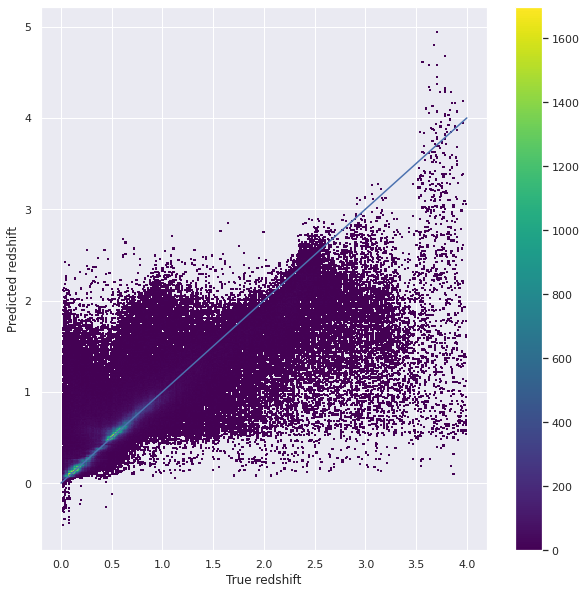

In [4]:
y_train_pred = xgb_model.predict(X_train)
y_train_pred = pd.Series(y_train_pred, index=y_train.index)
plot_predictions(y_train_pred, y_train)

In [5]:
metrics_agg = get_point_metrics(y_train_pred, y_train)
metrics_binned = get_point_metrics(y_train_pred, y_train, binned=True)
metrics_binned

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv
0,"(0.0, 0.2]",119560,0.142420,0.018855,0.021782,0.039474,0.039403,0.137228,0.101221
1,"(0.2, 0.4]",98740,0.188497,-0.001254,0.005353,0.057213,0.046566,0.202167,0.168817
2,"(0.4, 0.6]",141002,0.102738,0.012664,0.012947,0.039264,0.033622,0.127090,0.058084
3,"(0.6, 0.8]",106666,0.111702,0.000449,0.002200,0.044652,0.039840,0.120235,0.065560
4,"(0.8, 1.0]",53961,0.157711,-0.008688,-0.005664,0.056082,0.048935,0.147403,0.109709
5,"(1.0, 1.2]",23620,0.251499,-0.034094,-0.031723,0.095825,0.074815,0.135817,0.186664
6,"(1.2, 1.4]",13296,0.292407,-0.039633,-0.039002,0.126549,0.104934,0.080099,0.244810
7,"(1.4, 1.6]",8562,0.332523,-0.075028,-0.068901,0.134661,0.120731,0.058281,0.306938
8,"(1.6, 1.8]",6733,0.341756,-0.088911,-0.081531,0.128470,0.111399,0.070994,0.311451
9,"(1.8, 2.0]",5809,0.420656,-0.128241,-0.122455,0.124898,0.108721,0.077810,0.410226


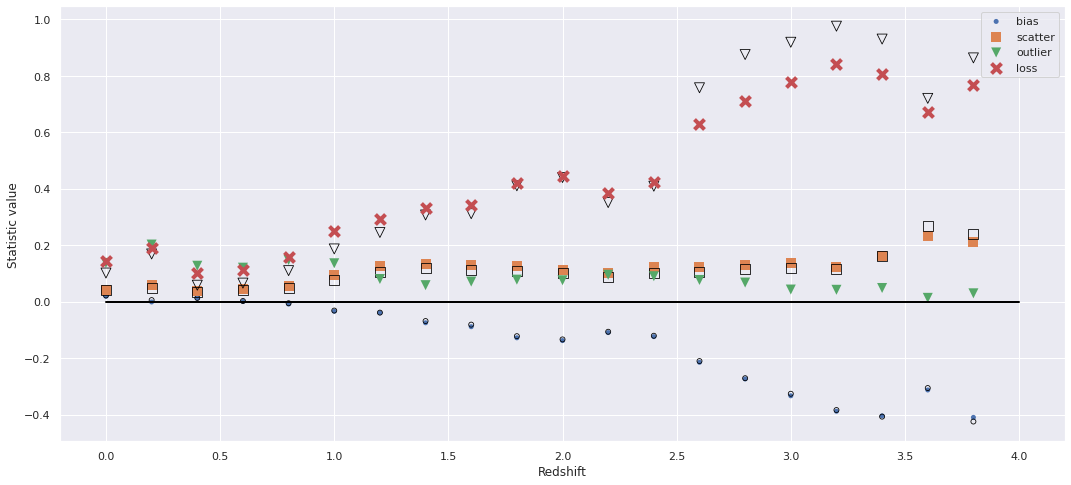

In [6]:
plot_point_metrics(metrics_binned)

## Evaluate test point estimates

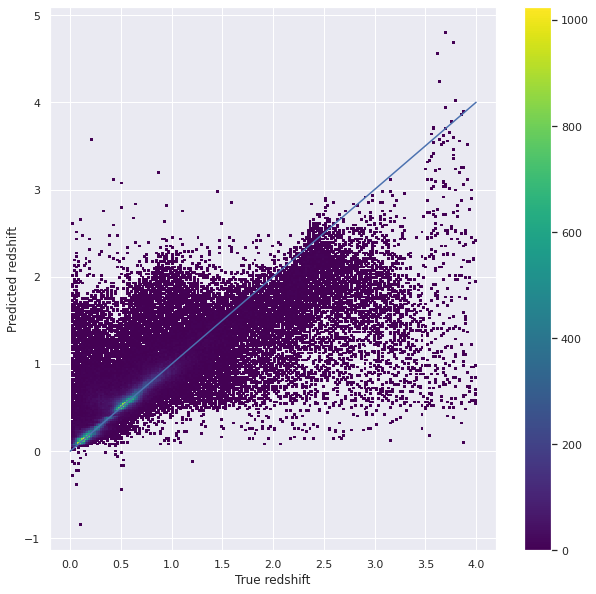

In [7]:
y_test_pred = xgb_model.predict(X_test)
y_test_pred = pd.Series(y_test_pred, index=y_test.index)
plot_predictions(y_test_pred, y_test)

In [8]:
metrics_agg = get_point_metrics(y_test_pred, y_test)
metrics_binned = get_point_metrics(y_test_pred, y_test, binned=True)
metrics_binned

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv
0,"(0.0, 0.2]",30061,0.142988,0.019035,0.021996,0.039494,0.039424,0.137055,0.101161
1,"(0.2, 0.4]",25073,0.189853,-0.001785,0.004727,0.056653,0.046718,0.203047,0.169266
2,"(0.4, 0.6]",34846,0.103152,0.012905,0.013253,0.039354,0.033950,0.125897,0.058342
3,"(0.6, 0.8]",26583,0.116399,0.000441,0.002284,0.045535,0.040233,0.123650,0.070007
4,"(0.8, 1.0]",13499,0.157667,-0.008829,-0.005948,0.055854,0.048574,0.147863,0.110082
5,"(1.0, 1.2]",5837,0.258183,-0.035315,-0.032074,0.097938,0.076052,0.140826,0.196505
6,"(1.2, 1.4]",3355,0.306422,-0.040850,-0.039530,0.132830,0.109979,0.067958,0.266766
7,"(1.4, 1.6]",2107,0.346347,-0.080838,-0.073987,0.136886,0.125779,0.048410,0.321785
8,"(1.6, 1.8]",1654,0.363347,-0.101275,-0.087228,0.137339,0.128546,0.053809,0.354897
9,"(1.8, 2.0]",1436,0.452580,-0.144675,-0.135386,0.137895,0.125225,0.054318,0.458914


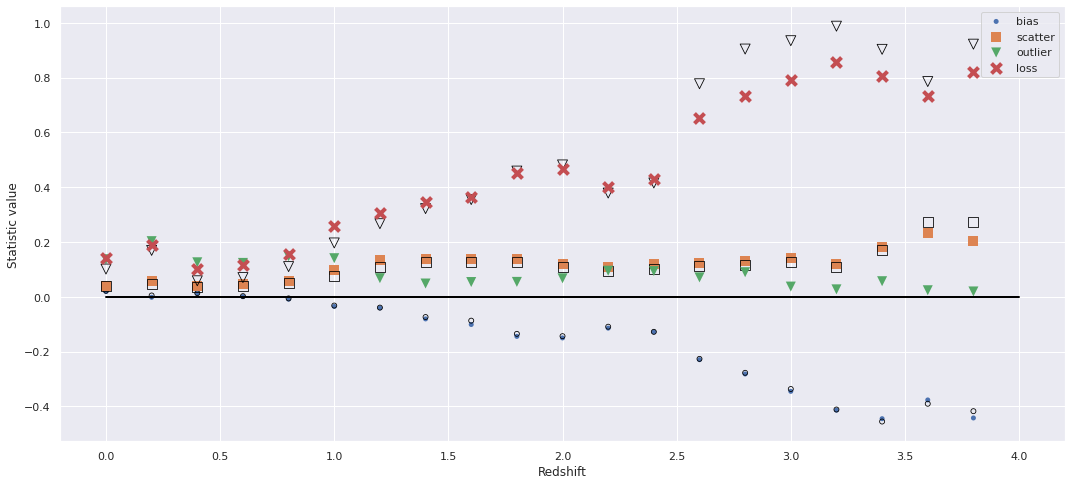

In [9]:
plot_point_metrics(metrics_binned)